# CS 418 Data Wranglers Project Progress Report

Reeve Lood, reeveal2@uic.edu, GitHub: WarlordGandhi24 -- Umang Prajapati, upraja2@uic.edu, GitHub: umangp2924 -- Kunal Patel, kpate391@uic.edu, GitHub: kpate391 -- Rimsha Rizvi, rrizvi3@uic.edu, GitHub: rimsharizvi06 -- Deep Patel, dpate329@uic.edu, GitHub: d20patel

Project GitHub: https://github.com/uic-ds-spring-2023/class-project----cs-418-spring-2023-data-wranglers

# Project Introduction

The data we are analyzing comes from a YouTube engagement survey by Wu et al. (GitHub: https://github.com/avalanchesiqi/youtube-engagement/blob/master/data/README.md). We are using the top_news.json file from the quality videos dataset (https://drive.google.com/drive/folders/1wZwDIR18IHPPTiH1C0dyBbGPR-3MktI7), which contains information about videos of the top 100 most viewed news channels. The question we are answering is this: How does the video topic affect viewer engagement?

# Changes

There have been changes with the project scope. We are no longer using the YouTube 8M dataset. We are instead using the top news dataset mentioned above. Also, we have modified our question. Instead of looking at how YouTube Shorts affect viewers' attention span, we are now looking at how the video topic affects viewer engagement. We are only using news videos, but we will still determine the popular news topics and viewer engagement.

# Data Cleaning

The original dataframe has 6 columns, 5 of which contain dict values. First, a separate dataframe is created for each of those 5 columns. For example, from the statistics column, a new dataframe is created with the dict's keys as its columns. The NA values and duplicates are then dropped from these dataframes.

In [1]:
import pandas as pd

df = pd.read_json('top_news.json', lines=True)
print('Number of rows:', df.size)
df.head(3)

Number of rows: 172110


,topicDetails,statistics,contentDetails,snippet,id,insights
0,{'topicCategories': ['https://en.wikipedia.org...,"{'commentCount': '0', 'viewCount': '701', 'fav...","{'duration': 'PT11M5S', 'definition': 'sd', 'd...",{'description': '⬇ Descargá la App de C5N para...,JEibcX5VF1M,"{'startDate': '2016-08-21', 'dailyShare': '6,2..."
1,{'topicCategories': ['https://en.wikipedia.org...,"{'commentCount': '0', 'viewCount': '889', 'fav...","{'duration': 'PT4M9S', 'definition': 'sd', 'di...",{'description': '⬇ Descargá la App de C5N para...,CJwOo9Yp3Jk,"{'startDate': '2016-08-10', 'dailyShare': '0,0..."
2,{'topicCategories': ['https://en.wikipedia.org...,"{'commentCount': '4', 'viewCount': '12720', 'f...","{'duration': 'PT13M11S', 'definition': 'hd', '...","{'description': '', 'title': 'C5N - Road Music...",CbdrzQPgGpI,"{'startDate': '2016-07-31', 'dailyShare': '5,2..."


In [2]:
import cleanup
topicDetails, statistics, contentDetails, snippets, insights = cleanup.cleanup() # runtime is several minutes

In [4]:
# Final dataframe created for the statistics column. Only showing 1 due to space limitations.
statistics.head(3)

,commentCount,viewCount,favoriteCount,dislikeCount,likeCount
0,0,701,0,0,9
1,0,889,0,0,10
2,4,12720,0,4,213


# Exploratory Data Analysis

The column values of the original dataframe (except the id column) contain dict values. Each record in the dataframes represents info about one video. Fox News has the most videos, and the most common video languages are English and Spanish.

In [5]:
snippets['channelTitle'].value_counts().head()

Fox News           483
The Young Turks    481
ABP NEWS           460
ABS-CBN News       459
Zee News           458
Name: channelTitle, dtype: int64

In [6]:
snippets['detectLang'].value_counts().head()

en    15966
es     2083
ar     1432
fr     1141
ru      938
Name: detectLang, dtype: int64

In [8]:
statistics.median() # one number from the five-number summary

commentCount        20.0
viewCount        17459.0
favoriteCount        0.0
dislikeCount         9.0
likeCount           77.0
dtype: float64

# Visualization

For our visualization, we chose to visualize the largest categories in the top news category. Each video in our database has a set of categories that is chosen when uploading a video. This set of categories is obtained from every video and counted in order to obtain the most popular news video genres. From the graph, we can say that by far the most popular is the "Society" tag, which makes sense given that top news is a video genre that primarily focuses on societal events. The most popular genres also include topics such as "Politics" and "Lifestyle", as well as "Music" and "Film". The ability to see these genres and their popularity will allow us to make further insights into the data of videos as a whole.

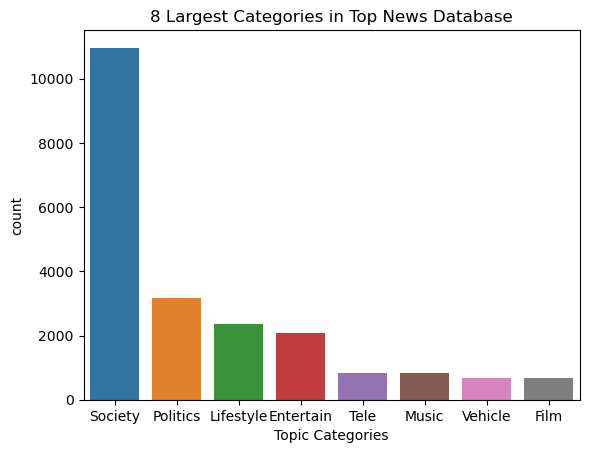

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from visualization import *

makeGraph()

# Machine Learning Analysis

The machine learning analysis that we wish to perform is creating a decision tree that can predict the video topic category (the target) given as attributes the dislike count and the like count. We were able to create the dataframe that takes the dislikeCount and likeCount columns from the statistics dataframe and appended the target column to it. However, we had issues creating the decision tree using this dataframe. This is something that we will accomplish for the final report.

In [16]:
import machine_learning
machine_learning.analyze()

,dislikeCount,likeCount,target
0,0,9,Pet
1,0,10,Entertainment
2,4,213,Music
3,1,4,Entertainment
4,2,10,Politics
...,...,...,...
24267,9,166,Film
24268,94,1125,Food
24269,55,291,Society
24270,17,181,Food


# Reflection

The hardest part of the project we've encountered so far is determining the main question, the data cleaning, and the machine learning analysis. From our initial visualization, we know that the most popular category is "Society". We also noticed that daily views naturally decline over time. The visualization is our concrete result as of now. However, in the coming weeks, we will make further insights into the video data. The current biggest challenge we face right now is performing a meaningful machine learning analysis on the data, so this will be something we need to dedicate more time towards. We believe that we are on track with our project as the dataset we have explored so far matches the project scope. Therefore, we believe it is worth proceeding with our project. Our analysis can help content creators understand what topics lead to higher viewer engagement.

# Next Steps

This month, we plan to accomplish the following: 2 machine learning or statistical analysis techniques, 2 distinct visualizations, 1 extra deliverable, and in-depth analysis. Our evaluation of whether these goals were met will consist of counting the number of distinct deliverables (at least 5) and the number of interesting insights (at least 5).